Setting up the environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyspark
!pip install gdown

Download Java

In [ ]:
!apt-get install openjdk-17-jdk -y
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  at-spi2-core fonts-dejavu-core fonts-dejavu-extra gsettings-desktop-schemas
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common librsvg2-common libxcomposite1 libxt-dev
  libxtst6 libxxf86dga1 openjdk-17-jre session-migration x11-utils
Suggested packages:
  gvfs libxt-doc openjdk-17-demo openjdk-17-source visualvm mesa-utils
The following NEW packages will be installed:
  at-spi2-core fonts-dejavu-core fonts-dejavu-extra gsettings-desktop-schemas
  libatk-bridge2.0-0 libatk-wrapper-java libatk-wrapper-java-jni libatk1.0-0
  libatk1.0-data libatspi2.0-0 libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common librsvg2-common libxcomposite1 libxt-dev
  libxtst6 libxxf86dga1 openjdk-17-jdk openjdk-17-jr

Setting path for java

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-17-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]

Downloading Dataset from Kaggle.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("devdope/900k-spotify")

print("Path to dataset files:", path)

100%|██████████| 1.00G/1.00G [00:47<00:00, 22.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/devdope/900k-spotify/versions/3


# Cleaning Data



In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
print(path)
print(os.listdir(path))

/root/.cache/kagglehub/datasets/devdope/900k-spotify/versions/3
['final_milliondataset_BERT_500K_revised.json', '900k Definitive Spotify Dataset.json', 'spotify_dataset.csv']


In [ ]:
file_path = os.path.join(path, 'spotify_dataset.csv') # get dataset from path

df = pd.read_csv(file_path)

df.head()

,Artist(s),song,text,Length,emotion,Genre,Album,Release Date,Key,Tempo,...,Good for Morning Routine,Similar Artist 1,Similar Song 1,Similarity Score 1,Similar Artist 2,Similar Song 2,Similarity Score 2,Similar Artist 3,Similar Song 3,Similarity Score 3
0,!!!,Even When the Waters Cold,Friends told her she was better off at the bot...,03:47,sadness,hip hop,Thr!!!er,29th April 2013,D min,105,...,0,Corey Smith,If I Could Do It Again,0.986061,Toby Keith,Drinks After Work,0.983719,Space,Neighbourhood,0.983236
1,!!!,One Girl / One Boy,"Well I heard it, playing soft From a drunken b...",04:03,sadness,hip hop,Thr!!!er,29th April 2013,A# min,117,...,0,Hiroyuki Sawano,BRE@TH//LESS,0.995409,When In Rome,Heaven Knows,0.990905,Justice Crew,Everybody,0.984483
2,!!!,Pardon My Freedom,"Oh my god, did I just say that out loud? Shoul...",05:51,joy,hip hop,Louden Up Now,8th June 2004,A Maj,121,...,0,Ricky Dillard,More Abundantly Medley Live,0.993176,Juliet,Avalon,0.965147,The Jacksons,Lovely One,0.956752
3,!!!,Ooo,[Verse 1] Remember when I called you on the te...,03:44,joy,hip hop,As If,16th October 2015,A min,122,...,0,Eric Clapton,Man Overboard,0.992749,Roxette,Don't Believe In Accidents,0.991494,Tiwa Savage,My Darlin,0.990381
4,!!!,Freedom 15,[Verse 1] Calling me like I got something to s...,06:00,joy,hip hop,As If,16th October 2015,F min,123,...,0,Cibo Matto,Lint Of Love,0.981610,Barrington Levy,Better Than Gold,0.981524,Freestyle,Its Automatic,0.981415


Checking summary statistics

In [ ]:
df.describe()

,Tempo,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness,Good for Party,...,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Social Gatherings,Good for Morning Routine,Similarity Score 1,Similarity Score 2,Similarity Score 3
count,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,...,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000
mean,120.513567,32.258106,62.661874,59.195460,47.738330,11.663980,19.655658,25.748436,7.152255,0.061809,...,0.030772,0.187334,0.053842,0.021484,0.057797,0.012253,0.066215,0.984107,0.979013,0.975938
std,29.185533,18.033931,22.399159,17.511007,24.159671,12.342389,16.274817,29.343731,20.589200,0.240808,...,0.172700,0.390180,0.225707,0.144990,0.233360,0.110014,0.248658,0.013559,0.015438,0.016512
min,31.000000,0.000000,0.000000,6.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002656,0.002647,0.002647
25%,97.000000,20.000000,48.000000,47.000000,28.000000,4.000000,10.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.977433,0.971582,0.967926
50%,120.000000,30.000000,65.000000,60.000000,47.000000,6.000000,13.000000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.985926,0.980971,0.978078
75%,140.000000,43.000000,80.000000,72.000000,66.000000,15.000000,25.000000,43.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.993567,0.988592,0.986079
max,200.000000,100.000000,100.000000,99.000000,100.000000,97.000000,100.000000,100.000000,100.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dataset of needed columns

In [ ]:
# keep only columns needed for recommendation system

cols_needed = ["Genre", "song", "Artist(s)", "emotion", "Release Date", "Tempo"]

df = df[cols_needed].copy()

String cleanup

In [ ]:
# basic cleaning of text columns

text_cols = ["Genre", "song", "Artist(s)", "emotion", "Release Date"]

# strip leading and trailing whitespace and make empty stings NaN

for col in text_cols:
  df[col] = (df[col]
             .astype(str) # ensure string
             .str.strip() # remove extra spaces
             .replace(r'^\s*$', np.nan, regex=True)) # change blank to NaN

Droppng missing values from needed fields

In [ ]:
# drop rows missing values in key identity fields

key_required_fields = ["Genre", "song", "Artist(s)"]

df.dropna(subset=key_required_fields, inplace=True)

In [ ]:
# drop rows missing values in supporting fields

df.dropna(subset=["emotion", "Release Date", "Tempo"], inplace=True)

Parse and clean the Release Date field

In [ ]:
# convert Release Date into datetime data type
df["Release Date"] = pd.to_datetime(df["Release Date"], errors = "coerce")

# extract year for later use (e.g., old and recent songs)
df["release_year"] = df["Release Date"].dt.year

In [ ]:
# Drop rows with invalid dates if they exist
df = df.dropna(subset=["Release Date", "release_year"])

In [ ]:
# checking for missing values
df.isnull().sum()

,0
Genre,0
song,0
Artist(s),0
emotion,0
Release Date,0
Tempo,0
release_year,0


Clean and Validate Tempo

In [ ]:
# convert Tempo to numeric data type
df["Tempo"] = pd.to_numeric(df["Tempo"], errors="coerce")

# drop rows where tempo is missing or clearly invalid
df = df.dropna(subset=["Tempo"])

Check Tempo for outliers

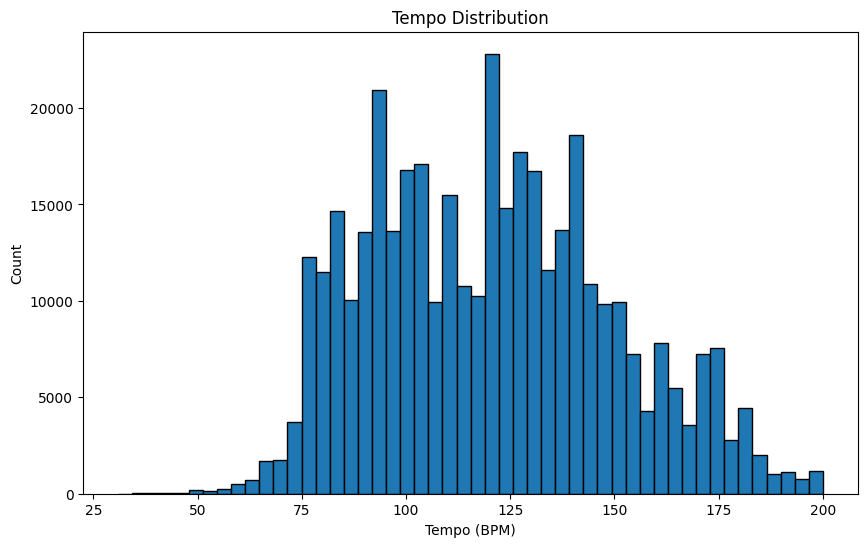

In [ ]:
# visualizing ditribution of Tempo values to spot outliers

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df["Tempo"], bins=50, edgecolor="black")
plt.title("Tempo Distribution")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Count")
plt.show()

Dig deeper by looking at quartiles

In [ ]:
# calculate the quantiles in inter-quartile range
q1 = df["Tempo"].quantile(0.25)
q3 = df["Tempo"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

outliers = df[(df["Tempo"] < lower_bound) | (df["Tempo"] > upper_bound)]
print("Outlier count:", len(outliers))

Lower bound: 32.5
Upper bound: 204.5
Outlier count: 3


In [ ]:
# outlier view
outliers.head()

,Genre,song,Artist(s),emotion,Release Date,Tempo,release_year
150839,hip hop,I Love Paris,"Ennio Morricone,Itzhak Perlman,John Williams,P...",love,1966-08-13,32,1966.0
332975,hip hop,Nachos,Nacho Datúr,sadness,2023-09-10,31,2023.0
472953,hip hop,Alien Spaceship,The Gray Spaceship,fear,2024-06-24,31,2024.0


In [ ]:
# filter out extreme outliers (e.g., < 32 or > 205 BPM)
df = df[(df["Tempo"] >= 32) & (df["Tempo"] <= 205)]

Normalize text formats

In [ ]:
# normalize Genre and emotion to lowercase
df["Genre"] = df["Genre"].str.lower()
df["emotion"] = df["emotion"].str.lower()

# renaming columns for easier use
df = df.rename(columns={
    "Genre": "genre",
    "song": "song_name",
    "Artist(s)": "artist_name",
    "Tempo" : "tempo",
    "Release Date" : "release_date"})

In [ ]:
# cleaning numerice value for release_year
df["release_year"] = df["release_year"].astype("Int64")

In [ ]:
df.head()

,genre,song_name,artist_name,emotion,release_date,tempo,release_year
0,hip hop,Even When the Waters Cold,!!!,sadness,2013-04-29,105,2013
1,hip hop,One Girl / One Boy,!!!,sadness,2013-04-29,117,2013
2,hip hop,Pardon My Freedom,!!!,joy,2004-06-08,121,2004
3,hip hop,Ooo,!!!,joy,2015-10-16,122,2015
4,hip hop,Freedom 15,!!!,joy,2015-10-16,123,2015


In [ ]:
df.shape

(389204, 7)

Remove duplicate

In [ ]:
# drop all duplicae rows
df = df.drop_duplicates()

# drop duplicate songs by artists
df = df.drop_duplicates(subset=["artist_name", "song_name"])

In [ ]:
df.shape

(350366, 7)

Save clean dataset

In [ ]:
df.to_csv("spotify_clean_dataset.csv", index = False)

print("Clean dataset size:", df.shape)

Clean dataset size: (350366, 7)


Feature Engineering


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import split, explode, trim, collect_set, array_join
from pyspark.sql import functions as F

# It appears there's an issue with the Java environment setup.
# The previous cell trying to install Java 11 failed, but Java 17 is installed.
# The JAVA_HOME environment variable was set to Java 11, which likely caused this error.
# Before running this cell, you need to fix the JAVA_HOME environment variable
# to point to a valid Java installation (e.g., Java 17).
# The fix is provided in cell `6cdIMFdXCS44`.

spark = SparkSession.builder \
    .appName("GenreFeatureEngineering") \
    .getOrCreate()

Loading the data

In [ ]:
df = spark.read.csv("spotify_clean_dataset.csv", header=True, inferSchema=True)

In [ ]:
df.show(5, truncate=False)

+-------+-------------------------+-----------+-------+------------+-----+------------+
|genre  |song_name                |artist_name|emotion|release_date|tempo|release_year|
+-------+-------------------------+-----------+-------+------------+-----+------------+
|hip hop|Even When the Waters Cold|!!!        |sadness|2013-04-29  |105  |2013        |
|hip hop|One Girl / One Boy       |!!!        |sadness|2013-04-29  |117  |2013        |
|hip hop|Pardon My Freedom        |!!!        |joy    |2004-06-08  |121  |2004        |
|hip hop|Ooo                      |!!!        |joy    |2015-10-16  |122  |2015        |
|hip hop|Freedom 15               |!!!        |joy    |2015-10-16  |123  |2015        |
+-------+-------------------------+-----------+-------+------------+-----+------------+
only showing top 5 rows



Split genre into singular categories

In [ ]:
df = df.withColumn("tempo", F.col("tempo").cast("int"))

df_genre_split = df.withColumn("genre", F.split(F.col("genre"), ",")) \
                   .withColumn("genre", F.explode(F.col("genre")))

df_genre_split.show(10, truncate=False)

+-------+-------------------------+-----------+--------+------------+-----+------------+
|genre  |song_name                |artist_name|emotion |release_date|tempo|release_year|
+-------+-------------------------+-----------+--------+------------+-----+------------+
|hip hop|Even When the Waters Cold|!!!        |sadness |2013-04-29  |105  |2013        |
|hip hop|One Girl / One Boy       |!!!        |sadness |2013-04-29  |117  |2013        |
|hip hop|Pardon My Freedom        |!!!        |joy     |2004-06-08  |121  |2004        |
|hip hop|Ooo                      |!!!        |joy     |2015-10-16  |122  |2015        |
|hip hop|Freedom 15               |!!!        |joy     |2015-10-16  |123  |2015        |
|hip hop|All U Writers            |!!!        |love    |2015-04-27  |122  |2015        |
|hip hop|Serbia Drums             |!!!        |sadness |2019-08-30  |104  |2019        |
|hip hop|Must Be the Moon         |!!!        |joy     |2007-03-05  |120  |2007        |
|hip hop|Slyd        

In [ ]:
# df_genre_split.write.mode("overwrite").csv("genre_split.csv", header=True)

Normalize the numeric values for tempo

In [ ]:
# Compute min and max of tempo


tempo_stats = df_genre_split.agg(
    F.min("tempo").alias("min_tempo"),
    F.max("tempo").alias("max_tempo")
).collect()[0]

min_tempo = tempo_stats['min_tempo']
max_tempo = tempo_stats['max_tempo']

# Apply min-max normalization
df_normalized = df_genre_split.withColumn(
    "tempo_normalized",
    (F.col("tempo") - min_tempo) / (max_tempo - min_tempo)
)

df_normalized.show(10, truncate=False)

+-------+-------------------------+-----------+--------+------------+-----+------------+-------------------+
|genre  |song_name                |artist_name|emotion |release_date|tempo|release_year|tempo_normalized   |
+-------+-------------------------+-----------+--------+------------+-----+------------+-------------------+
|hip hop|Even When the Waters Cold|!!!        |sadness |2013-04-29  |105  |2013        |0.43452380952380953|
|hip hop|One Girl / One Boy       |!!!        |sadness |2013-04-29  |117  |2013        |0.5059523809523809 |
|hip hop|Pardon My Freedom        |!!!        |joy     |2004-06-08  |121  |2004        |0.5297619047619048 |
|hip hop|Ooo                      |!!!        |joy     |2015-10-16  |122  |2015        |0.5357142857142857 |
|hip hop|Freedom 15               |!!!        |joy     |2015-10-16  |123  |2015        |0.5416666666666666 |
|hip hop|All U Writers            |!!!        |love    |2015-04-27  |122  |2015        |0.5357142857142857 |
|hip hop|Serbia Dru

Saved file for both feature engineering and Normalized tempo

In [ ]:
df_normalized.write.mode("overwrite").csv("featured_eng_normalized_tempo_songs.csv", header=True)

Load Data back into Spark

In [ ]:
df = spark.read.csv("featured_eng_normalized_tempo_songs.csv", header=True, inferSchema=True)
#df.show(5)

One-Hot Encode Genre and Emotion

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
import pyspark.sql.functions as F

# I came back and added this because Spark Failed with Nulls
df = df.dropna(subset=["genre", "emotion", "tempo_normalized"])

#Prepare for the one hot encoding
#Do this by converting columns from text into numerical indices
genre_indexer = StringIndexer(
    inputCol="genre",
    outputCol="genre_index",
    handleInvalid="keep"
)

emotion_indexer = StringIndexer(
    inputCol="emotion",
    outputCol="emotion_index",
    handleInvalid="keep"
)

#Convert categories into encoded vectors
encoder = OneHotEncoder(
    inputCols=["genre_index", "emotion_index"],
    outputCols=["genre_vec", "emotion_vec"],
    handleInvalid="keep"
)

#combine vectors into a single feature vector
assembler = VectorAssembler(
    inputCols=["genre_vec", "emotion_vec", "tempo_normalized"],
    outputCol="features",
    handleInvalid="keep"
)

#single transformation pipeline
pipeline = Pipeline(stages=[genre_indexer, emotion_indexer, encoder, assembler])

model = pipeline.fit(df)
df_features = model.transform(df)

#VALIDATE FIRST FEW ROWS
#df_features.select(
#    "song_name", "genre", "emotion", "tempo_normalized", "features"
#).show(5, truncate=False)

Cosine Similarity

In [ ]:
import pyspark.sql.functions as F
from pyspark.ml.linalg import DenseVector, SparseVector
import numpy as np

#cosine sim between two vectors
def cosine_similarity(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    denom = np.linalg.norm(v1) * np.linalg.norm(v2)
    if denom == 0:
        return 0.0
    return float(np.dot(v1, v2) / denom)

#register function as spark UDF
#Can then be tested on Spark Dataframe
cosine_udf = F.udf(cosine_similarity)

Get Top-K Similar Songs (Give Recomendations)

In [ ]:
def top_k_similar(song_title, k=10):

    # Grab the vector for the requested song
    target = df_features.filter(F.col("song_name") == song_title).select("features").first()

    # Convert Vector to Python list
    target_vec = target["features"].toArray().tolist()

    # Compute similarity with all other songs
    scored = df_features.withColumn(
        "similarity",
        cosine_udf(F.col("features"), F.lit(target_vec))
    )

    # Exclude the song itself and sort by similarity
    result = scored.filter(F.col("song_name") != song_title) \
                   .orderBy(F.col("similarity").desc()) \
                   .select("song_name", "artist_name", "genre", "emotion", "tempo_normalized", "similarity") \
                   .limit(k)

    return result

Test Recomendation and Save Results

In [ ]:
#Will use Taylor Swifts Love story and get the top 10 recomended

results = top_k_similar("Love Story", 10)
results.show(truncate=False)

#output to file
results.write.mode("overwrite").csv("recommendations_love_story.csv", header=True)



+----------------------+------------+-----+-------+------------------+----------+
|song_name             |artist_name |genre|emotion|tempo_normalized  |similarity|
+----------------------+------------+-----+-------+------------------+----------+
|King of Kings         |Motörhead   |rock |sadness|0.6428571428571429|1.0       |
|Love Was Made to Break|Andy Black  |rock |sadness|0.6428571428571429|1.0       |
|Born to Raise Hell    |Motörhead   |rock |sadness|0.6428571428571429|1.0       |
|Cosmia                |Asa Kora    |rock |sadness|0.6428571428571429|1.0       |
|Guard you             |MIYAVI      |rock |sadness|0.6428571428571429|1.0       |
|Heaven                |Andy Black  |rock |sadness|0.6428571428571429|1.0       |
|Death or Glory        |Motörhead   |rock |sadness|0.6428571428571429|1.0       |
|The Broken            |3 Doors Down|rock |sadness|0.6428571428571429|1.0       |
|Dont Let Daddy Kiss Me|Motörhead   |rock |sadness|0.6428571428571429|1.0       |
|Feast or Famine

In [ ]:
# precision score evaluation

def precision_at_k(song_title, results_df):
  # get target song metadata
  meta = df_features.filter(F.col("song_name") == song_title)\
    .select("genre", "emotion")\
    .first()
  target_genre = meta["genre"]
  target_emotion = meta["emotion"]

  # count the top K share in both fields
  relevant = results_df.filter(
      (F.col("genre") == target_genre) &
      (F.col("emotion") == target_emotion)
  ).count()

  # get precision
  K = results_df.count()
  precision = relevant / K
  return precision

# test
precision = precision_at_k("Love Story", results)
print("precision at top 10: ", precision)

precision at top 10:  1.0
